In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Autonomous-AI/Day1/1_07_CV_LineDetection/warpexample/

/content/drive/MyDrive/Autonomous-AI/Day1/1_07_CV_LineDetection/warpexample


(676, 416)


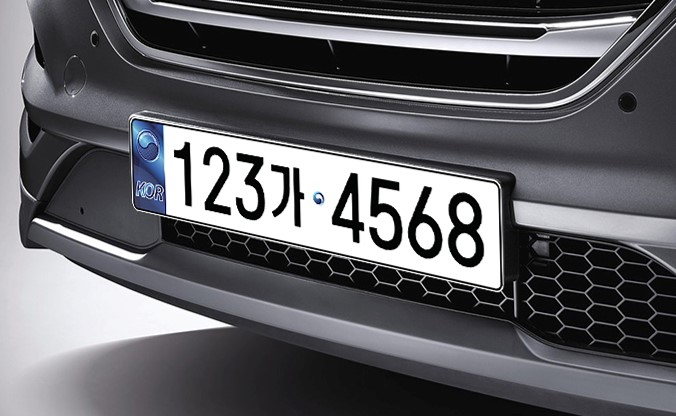

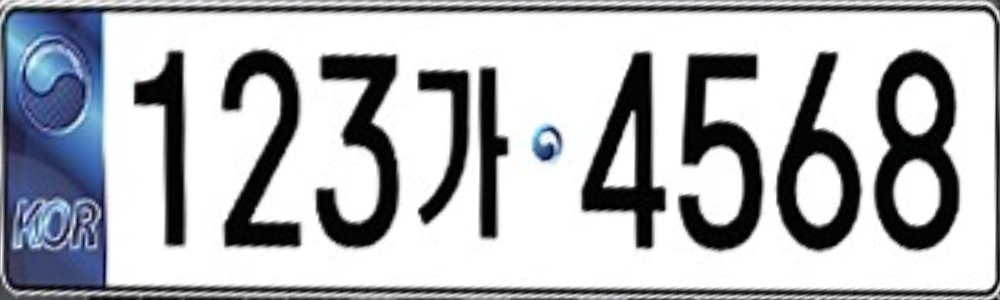

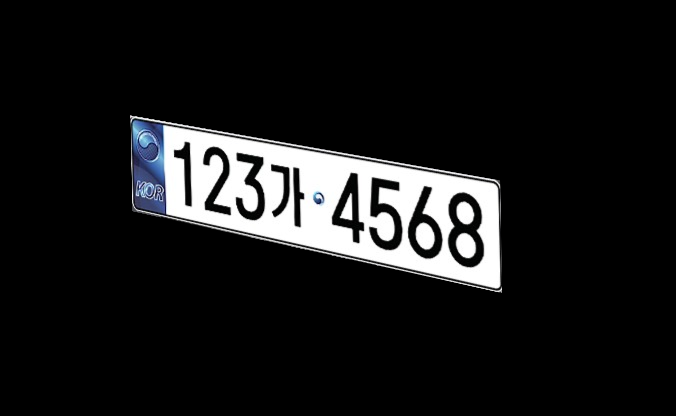

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
image = cv2.imread('warpexample.jpg') # 이미지 읽기

img_size = (image.shape[1], image.shape[0])
print(img_size);
cv2_imshow(image)


src = np.float32([[130, 115],
                  [132, 211],
                  [502, 293],
                  [500, 180]])

dst = np.float32([[0, 0],
                  [0, 300],
                  [1000, 300],
                  [1000, 0]])

matrix = cv2.getPerspectiveTransform(src, dst)   #BEV로 바꿔주는 변환행렬
minv = cv2.getPerspectiveTransform(dst, src)     #BEV에서 원상태로 바꿔주는 변환행렬

birdseye = cv2.warpPerspective(image, matrix, (1000,300))  #BEV로 바꿔줌
re_warp = cv2.warpPerspective(birdseye, minv, img_size)  #원상태로 바꿔줌

cv2_imshow(birdseye)
cv2_imshow(re_warp)